# Running CPM on a Southern, bright M dwarf target.

In [1]:
import tess_cpm
import numpy as np
import matplotlib.pyplot as plt
import lightkurve as lk
from astropy.io import fits
from astropy.wcs import WCS
import pandas as pd
import glob

plt.rcParams["figure.figsize"] = (14, 10)

import tess_rotation as tr

To download data for a star, go to the TESScut website and download a 68x68 pixel cutout. https://mast.stsci.edu/tesscut/

Then move the fits files to the /Users/rangus/projects/TESS-rotation/data/TESScut directory.

### ticid = 150428135
# path = "/Users/rangus/projects/TESS-rotation/data/TESScut/astrocut_97.0967865903209_-65.5793115481931_68x68px"
# sectors = [1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13]

# ticid = 167721744
# path = "/Users/rangus/projects/TESS-rotation/data/TESScut/astrocut_103.422574757855_-62.7678787389579_68x68px"
# sectors = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

# ticid = 176954932
# path = "/Users/rangus/projects/TESS-rotation/data/TESScut/astrocut_100.874046860035_-70.0557323751231_68x68px"
# sectors = [2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13]

# ticid = 389561485  # Running detrending code. Crowded field
# path = "/Users/rangus/projects/TESS-rotation/data/TESScut/astrocut_86.1632480868659_-69.0633096300411_68x68px"
# sectors = [1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13]

# 167306154  # Downloaded and moved over
# astrocut_98.1875954923302_-66.9484820333233_68x68px

# 177386111  # Downloaded and moved over
# astrocut_104.411003531986_-72.4973522954177_68x68px

# Faint stars (15 < Tmag < 15.5)
# ---------------------------------------------------------------------------------------------------------------
# ticid = 140899863
# path = "/Users/rangus/projects/TESS-rotation/data/TESScut/astrocut_76.9369256641639_-76.3916328094858_68x68px"
# sectors = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

# ticid = 167042097
# sectors = [1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13]
# path = "/Users/rangus/projects/TESS-rotation/data/TESScut/astrocut_95.1290881695047_-71.3446272567744_68x68px"

# ticid = 55557347
# sectors = [1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13]
# path = "/Users/rangus/projects/TESS-rotation/data/TESScut/astrocut_72.8820686597553_-60.4980950465095_68x68px"

# ticid = 150068381 
# path = "/Users/rangus/projects/TESS-rotation/data/TESScut/astrocut_91.8717111045812_-64.1590024720773_68x68px"
# sectors = [1, 2, 4, 5, 6, 7, 8, 9, 11, 12, 13]

# 16th mag stars
# ---------------------------------------------------------------------------------------------------------------
# ticid = 271889951
# path = "/Users/rangus/projects/TESS-rotation/data/TESScut/astrocut_112.656291973887_-75.0302634400717_68x68px"
# sectors = [1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13]

# ticid = 150100106  # Not sure it's possible.
# path = "/Users/rangus/projects/TESS-rotation/data/TESScut/astrocut_92.1087401735209_-60.558440642644_68x68px"
# sectors = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

# 15th mag stars (14.99 < Tmag < 15.01)[306637027 271697261 167125544 349061281  55478163 349646781 350298643 32154833]
# ---------------------------------------------------------------------------------------------------------------
# ticid = 349061281  # Good isolated target but flat lc
# path = "/Users/rangus/projects/TESS-rotation/data/TESScut/astrocut_107.471456786207_-61.5366731480293_68x68px"
# sectors = [1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13]

# ticid = 32154833  # isolated target but flat lc.
# path = "/Users/rangus/projects/TESS-rotation/data/TESScut/astrocut_59.6080557849847_-67.0559636851472_68x68px"
# sectors = [1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13]

# Slightly brighter 15th mag stars (14.95 < Tmag < 14.99)
# ---------------------------------------------------------------------------------------------------------------
# ticid = 262614962   # Don't see a star.

# ticid = 294092227  # Flat lc
# sectors = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
# path = "/Users/rangus/projects/TESS-rotation/data/TESScut/astrocut_107.444470892892_-58.4023279121035_68x68px"

# ticid = 141768162  # Too faint and crowded
# sectors = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
# path = "/Users/rangus/projects/TESS-rotation/data/TESScut/astrocut_91.7685115956239_-73.4895418044675_68x68px"

# ticid = 149665709  # Download failed

# ticid = 141187012  # Don't see a star.
# sectors = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
# path = "/Users/rangus/projects/TESS-rotation/data/TESScut/astrocut_81.5706747673612_-77.7097381988194_68x68px"

ticid = 260354552
sectors = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
path = "/Users/rangus/projects/TESS-rotation/data/TESScut/astrocut_94.9608595415412_-55.9150480977925_68x68px"

# ticid = 260129956
# sectors = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
# path = "/Users/rangus/projects/TESS-rotation/data/TESScut/

# ticid = 141029782
# sectors = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
# path = "/Users/rangus/projects/TESS-rotation/data/TESScut/

# ticid = 179372511
# sectors = [1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13]
# path = "/Users/rangus/projects/TESS-rotation/data/TESScut/
# ticid = 300037002
# sectors = [1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13]
# path = "/Users/rangus/projects/TESS-rotation/data/TESScut/

# ticid = 38509166
# sectors = [1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13]
# path = "/Users/rangus/projects/TESS-rotation/data/TESScut/

# ticid = 382199364
# sectors = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
# path = "/Users/rangus/projects/TESS-rotation/data/TESScut/

# ticid = 372850818
# sectors = [2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13]
# path = "/Users/rangus/projects/TESS-rotation/data/TESScut/

# ticid = 279322643
# sectors = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
# path = "/Users/rangus/projects/TESS-rotation/data/TESScut/

# ticid = 260655797
# sectors = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
# path = "/Users/rangus/projects/TESS-rotation/data/TESScut/

# ticid = 276793233
# sectors = [1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13]
# path = "/Users/rangus/projects/TESS-rotation/data/TESScut/

In [ ]:
### ticid = 150428135
# path = "/Users/rangus/projects/TESS-rotation/data/TESScut/astrocut_97.0967865903209_-65.5793115481931_68x68px"
# sectors = [1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13]

# ticid = 167721744
# path = "/Users/rangus/projects/TESS-rotation/data/TESScut/astrocut_103.422574757855_-62.7678787389579_68x68px"
# sectors = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

# ticid = 176954932
# path = "/Users/rangus/projects/TESS-rotation/data/TESScut/astrocut_100.874046860035_-70.0557323751231_68x68px"
# sectors = [2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13]

# ticid = 389561485  # Running detrending code. Crowded field
# path = "/Users/rangus/projects/TESS-rotation/data/TESScut/astrocut_86.1632480868659_-69.0633096300411_68x68px"
# sectors = [1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13]

# 167306154  # Downloaded and moved over
# astrocut_98.1875954923302_-66.9484820333233_68x68px

# 177386111  # Downloaded and moved over
# astrocut_104.411003531986_-72.4973522954177_68x68px

# Faint stars (15 < Tmag < 15.5)
# ---------------------------------------------------------------------------------------------------------------
# ticid = 140899863
# path = "/Users/rangus/projects/TESS-rotation/data/TESScut/astrocut_76.9369256641639_-76.3916328094858_68x68px"
# sectors = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

# ticid = 167042097
# sectors = [1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13]
# path = "/Users/rangus/projects/TESS-rotation/data/TESScut/astrocut_95.1290881695047_-71.3446272567744_68x68px"

# ticid = 55557347
# sectors = [1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13]
# path = "/Users/rangus/projects/TESS-rotation/data/TESScut/astrocut_72.8820686597553_-60.4980950465095_68x68px"

# ticid = 150068381 
# path = "/Users/rangus/projects/TESS-rotation/data/TESScut/astrocut_91.8717111045812_-64.1590024720773_68x68px"
# sectors = [1, 2, 4, 5, 6, 7, 8, 9, 11, 12, 13]

# 16th mag stars
# ---------------------------------------------------------------------------------------------------------------
# ticid = 271889951
# path = "/Users/rangus/projects/TESS-rotation/data/TESScut/astrocut_112.656291973887_-75.0302634400717_68x68px"
# sectors = [1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13]

# ticid = 150100106  # Not sure it's possible.
# path = "/Users/rangus/projects/TESS-rotation/data/TESScut/astrocut_92.1087401735209_-60.558440642644_68x68px"
# sectors = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

# 15th mag stars (14.99 < Tmag < 15.01)[306637027 271697261 167125544 349061281  55478163 349646781 350298643 32154833]
# ---------------------------------------------------------------------------------------------------------------
# ticid = 349061281  # Good isolated target but flat lc
# path = "/Users/rangus/projects/TESS-rotation/data/TESScut/astrocut_107.471456786207_-61.5366731480293_68x68px"
# sectors = [1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13]

# ticid = 32154833  # isolated target but flat lc.
# path = "/Users/rangus/projects/TESS-rotation/data/TESScut/astrocut_59.6080557849847_-67.0559636851472_68x68px"
# sectors = [1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13]

# Slightly brighter 15th mag stars (14.95 < Tmag < 14.99)
# ---------------------------------------------------------------------------------------------------------------
# ticid = 262614962   # Don't see a star.

# ticid = 294092227  # Flat lc
# sectors = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
# path = "/Users/rangus/projects/TESS-rotation/data/TESScut/astrocut_107.444470892892_-58.4023279121035_68x68px"

# ticid = 141768162  # Too faint and crowded
# sectors = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
# path = "/Users/rangus/projects/TESS-rotation/data/TESScut/astrocut_91.7685115956239_-73.4895418044675_68x68px"

# ticid = 149665709  # Download failed

# ticid = 141187012  # Don't see a star.
# sectors = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
# path = "/Users/rangus/projects/TESS-rotation/data/TESScut/astrocut_81.5706747673612_-77.7097381988194_68x68px"

ticid = 260354552
sectors = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
path = "/Users/rangus/projects/TESS-rotation/data/TESScut/astrocut_94.9608595415412_-55.9150480977925_68x68px"

# ticid = 260129956
# sectors = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
# path = "/Users/rangus/projects/TESS-rotation/data/TESScut/

# ticid = 141029782
# sectors = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
# path = "/Users/rangus/projects/TESS-rotation/data/TESScut/

# ticid = 179372511
# sectors = [1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13]
# path = "/Users/rangus/projects/TESS-rotation/data/TESScut/
# ticid = 300037002
# sectors = [1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13]
# path = "/Users/rangus/projects/TESS-rotation/data/TESScut/

# ticid = 38509166
# sectors = [1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13]
# path = "/Users/rangus/projects/TESS-rotation/data/TESScut/

# ticid = 382199364
# sectors = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
# path = "/Users/rangus/projects/TESS-rotation/data/TESScut/

# ticid = 372850818
# sectors = [2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13]
# path = "/Users/rangus/projects/TESS-rotation/data/TESScut/

# ticid = 279322643
# sectors = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
# path = "/Users/rangus/projects/TESS-rotation/data/TESScut/

# ticid = 260655797
# sectors = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
# path = "/Users/rangus/projects/TESS-rotation/data/TESScut/

# ticid = 276793233
# sectors = [1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13]
# path = "/Users/rangus/projects/TESS-rotation/data/TESScut/

Removing 15 bad data points (out of 1282) using the TESS provided QUALITY array


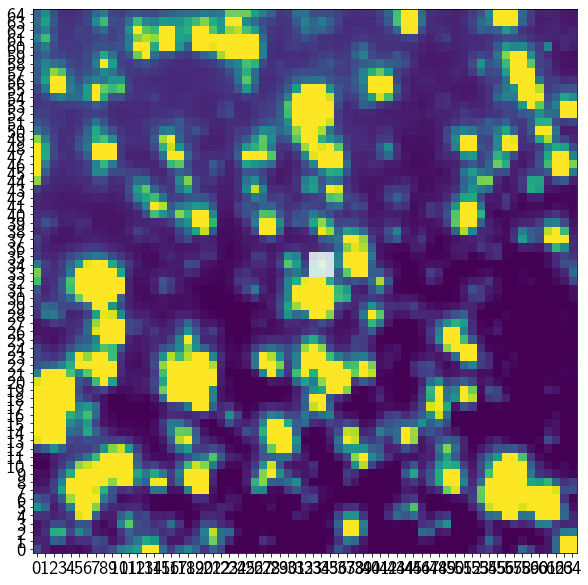

In [165]:
plot = True

fits_files0 = glob.glob("{0}/tess-s00{1}-*_astrocut.fits".format(path, str(sectors[0]).zfill(2)))[0]  
collims0, rowlims0 = tr.select_aperture(sectors[0], [33, 35], [33, 35], fits_files0, plot=plot)

# fits_files1 = glob.glob("{0}/tess-s00{1}-*_astrocut.fits".format(path, str(sectors[1]).zfill(2)))[0]  
# collims1, rowlims1 = tr.select_aperture(sectors[1], [33, 35], [33, 35], fits_files1, plot=plot)

# fits_files2 = glob.glob("{0}/tess-s00{1}-*_astrocut.fits".format(path, str(sectors[2]).zfill(2)))[0]  
# collims2, rowlims2 = tr.select_aperture(sectors[2], [34, 36], [34, 35], fits_files2, plot=plot)

# fits_files3 = glob.glob("{0}/tess-s00{1}-*_astrocut.fits".format(path, str(sectors[3]).zfill(2)))[0]  
# collims3, rowlims3 = tr.select_aperture(sectors[3], [33, 35], [33, 35], fits_files3, plot=plot)

# fits_files4 = glob.glob("{0}/tess-s00{1}-*_astrocut.fits".format(path, str(sectors[4]).zfill(2)))[0]  
# collims4, rowlims4 = tr.select_aperture(sectors[4], [33, 35], [33, 35], fits_files4, plot=plot)

# fits_files5 = glob.glob("{0}/tess-s00{1}-*_astrocut.fits".format(path, str(sectors[5]).zfill(2)))[0]  
# collims5, rowlims5 = tr.select_aperture(sectors[5], [33, 35], [32, 34], fits_files5, plot=plot)

# fits_files6 = glob.glob("{0}/tess-s00{1}-*_astrocut.fits".format(path, str(sectors[6]).zfill(2)))[0]  
# collims6, rowlims6 = tr.select_aperture(sectors[6], [33, 35], [32, 34], fits_files6, plot=plot)

# fits_files7 = glob.glob("{0}/tess-s00{1}-*_astrocut.fits".format(path, str(sectors[7]).zfill(2)))[0]  
# collims7, rowlims7 = tr.select_aperture(sectors[7], [34, 36], [33, 35], fits_files7, plot=plot)

# fits_files8 = glob.glob("{0}/tess-s00{1}-*_astrocut.fits".format(path, str(sectors[8]).zfill(2)))[0]  
# collims8, rowlims8 = tr.select_aperture(sectors[8], [34, 36], [33, 35], fits_files8, plot=plot)

# fits_files9 = glob.glob("{0}/tess-s00{1}-*_astrocut.fits".format(path, str(sectors[9]).zfill(2)))[0]  
# collims9, rowlims9 = tr.select_aperture(sectors[9], [33, 35], [33, 35], fits_files9, plot=plot)

# fits_files10 = glob.glob("{0}/tess-s00{1}-*_astrocut.fits".format(path, str(sectors[10]).zfill(2)))[0]  
# collims10, rowlims10 = tr.select_aperture(sectors[10], [34, 36], [34, 36], fits_files10, plot=plot)

# fits_files11 = glob.glob("{0}/tess-s00{1}-*_astrocut.fits".format(path, str(sectors[11]).zfill(2)))[0]  
# collims11, rowlims11 = tr.select_aperture(sectors[11], [33, 35], [32, 34], fits_files11, plot=plot)

# fits_files12 = glob.glob("{0}/tess-s00{1}-*_astrocut.fits".format(path, str(sectors[12]).zfill(2)))[0]  
# collims12, rowlims12 = tr.select_aperture(sectors[12], [33, 35], [33, 35], fits_files12, plot=plot)

In [142]:
collims = [collims0, collims1, collims2, collims3, collims4, collims5, collims6, collims7, collims8, collims9, collims10, collims11, collims12]
rowlims = [rowlims0, rowlims1, rowlims2, rowlims3, rowlims4, rowlims5, rowlims6, rowlims7, rowlims8, rowlims9, rowlims10, rowlims11, rowlims12]

In [143]:
colstart, colstop = zip(*collims)
rowstart, rowstop = zip(*rowlims)

df = pd.DataFrame(dict({"sectors": sectors,
                        "collims": collims,
                        "rowlims": rowlims,
                        "colstart": colstart,
                        "colstop": colstop,
                        "rowstart": rowstart,
                        "rowstop": rowstop}))
df.to_csv("{}_aperture.csv".format(ticid))

df_reload = pd.read_csv("{}_aperture.csv".format(ticid))
collims = list(zip(df_reload.colstart.values, df_reload.colstop.values))
rowlims = list(zip(df_reload.rowstart.values, df_reload.rowstop.values))

In [144]:
x, y = [], []
for i in range(len(sectors)):
    fits_files = glob.glob("{0}/tess-s00{1}-*_astrocut.fits".format(path, str(sectors[i]).zfill(2)))[0]  
    _x, _y = tr.make_lc_single_sector(sectors[i], collims[i], rowlims[i], fits_files, plot=False, save_to_file=False)
    x.append(_x)
    y.append(_y)

x = np.array([i for j in x for i in j])
y = np.array([i for j in y for i in j])

Removing 15 bad data points (out of 1282) using the TESS provided QUALITY array
Summing over 3 x 2 pixel lightcurves
Summing over 3 x 2 pixel lightcurves
Summing over 3 x 2 pixel lightcurves
Summing over 3 x 2 pixel lightcurves
Removing 17 bad data points (out of 1245) using the TESS provided QUALITY array
Summing over 3 x 3 pixel lightcurves
Summing over 3 x 3 pixel lightcurves
Summing over 3 x 3 pixel lightcurves
Summing over 3 x 3 pixel lightcurves
Removing 13 bad data points (out of 1288) using the TESS provided QUALITY array
Summing over 2 x 3 pixel lightcurves
Summing over 2 x 3 pixel lightcurves
Summing over 2 x 3 pixel lightcurves
Summing over 2 x 3 pixel lightcurves
Removing 14 bad data points (out of 1060) using the TESS provided QUALITY array
Summing over 3 x 3 pixel lightcurves
Summing over 3 x 3 pixel lightcurves
Summing over 3 x 3 pixel lightcurves
Summing over 3 x 3 pixel lightcurves
Removing 23 bad data points (out of 1196) using the TESS provided QUALITY array
Summing 

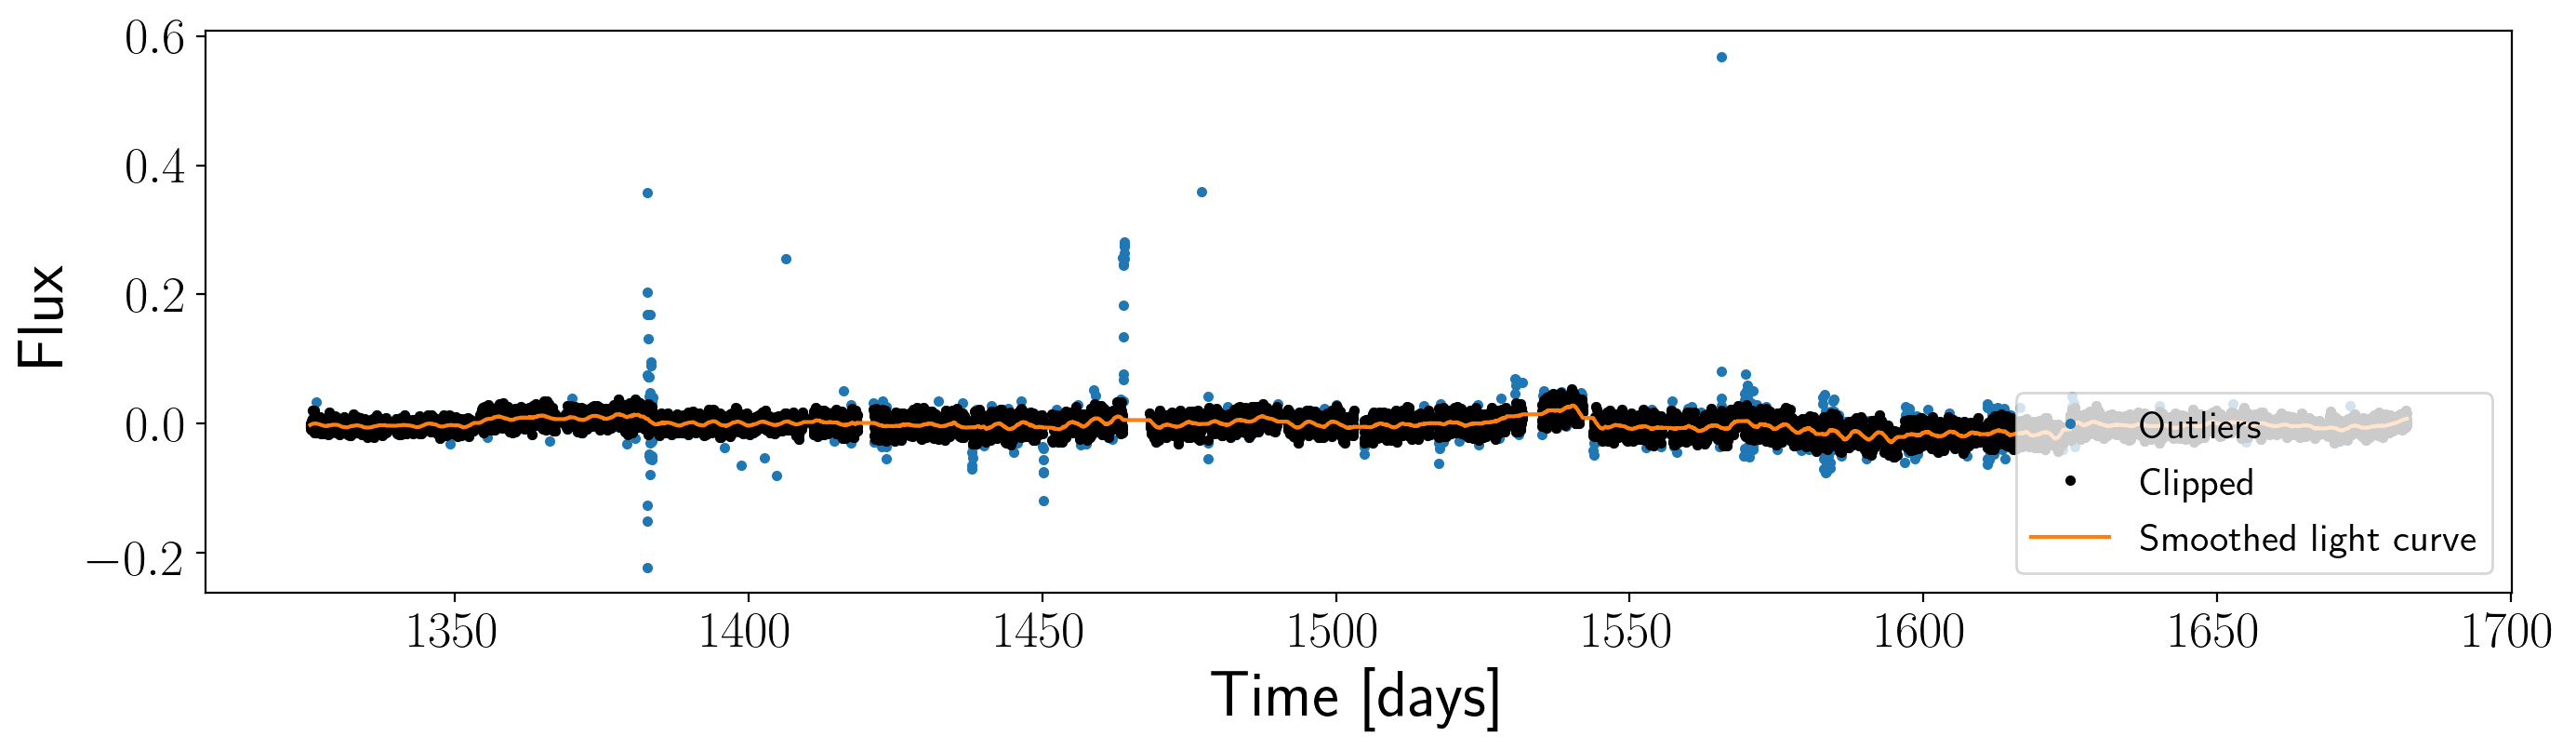

In [145]:
import starspot as ss

# Do an initial sigma clip to remove big outliers.
m = ss.sigma_clip(y, nsigma=6)
t, f = x[m], y[m]

# Then a sigma clip using a Sav-Gol filter for smoothing
mask, smooth = ss.filter_sigma_clip(t, f, window_length=199)

time, flux = t[mask], f[mask]

plt.figure(figsize=(16, 4), dpi=200)
plt.plot(x, y, ".", label="Outliers")
plt.plot(time, flux, "k.", label="Clipped")
plt.plot(t, smooth, label="Smoothed light curve")
plt.xlabel("Time [days]")
plt.ylabel("Flux");
# plt.ylim(-.08, .08);
plt.legend(loc="lower right", fontsize=15);

0.00917394416052166


<ErrorbarContainer object of 3 artists>

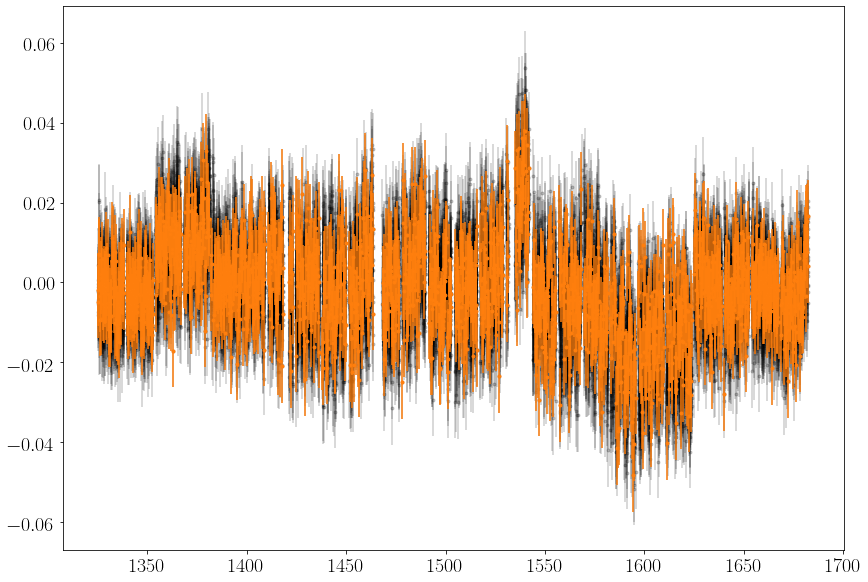

In [146]:
import astropy.stats as aps

flux_err = np.ones_like(flux) * 1.5*aps.median_absolute_deviation(f - smooth)
ferr = np.ones_like(t) * 1.5*aps.median_absolute_deviation(f - smooth)
print(flux_err[0])

# plt.errorbar(t, f-smooth, yerr=ferr, fmt="k.", alpha=.2)
plt.errorbar(time, flux, yerr=flux_err, fmt="k.", alpha=.2, zorder=0)

cut, sub = len(time), 10
x, y, yerr = time[:cut:sub], flux[:cut:sub], flux_err[:cut:sub]
plt.errorbar(x, y, yerr=yerr, fmt="C1.", alpha=1, zorder=1)

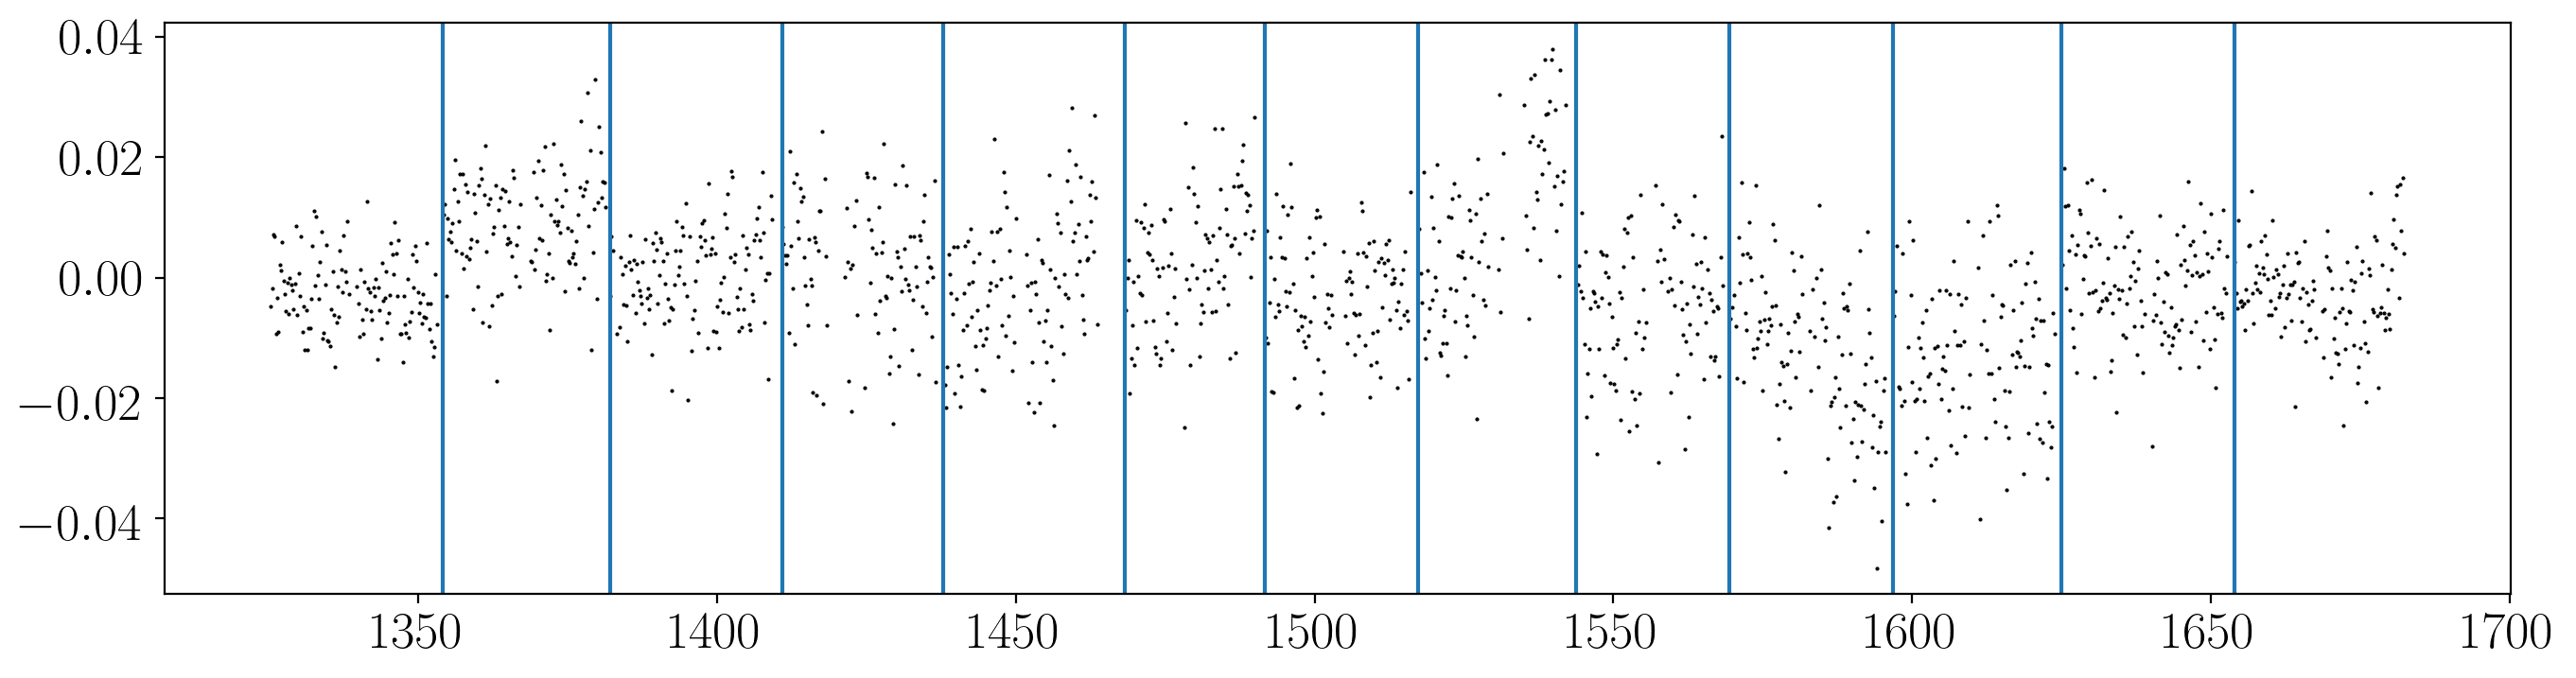

In [149]:
sector_times = pd.read_csv("sector_times.csv")

plt.figure(figsize=(16, 4), dpi=200)
plt.plot(x, y, "k.", ms=1)

m = (sector_times.event == "start")
starts = sector_times.TJD.values[m]
gap_times = list(starts)

# gap_times.pop(0)

# gap_times.pop(0)
gap_times.pop(0)
# gap_times.pop(-2)
gap_times = gap_times[:12]

for t in gap_times:
    plt.axvline(t)

In [150]:
steps = np.zeros(len(gap_times))
star = ss.StitchModel(x, np.ascontiguousarray(y, dtype=np.float64), yerr, gap_times, steps, 2.0)

In [151]:
star.model_offsets()
map_soln = star.find_optimum()
mu_gp, var = star.evaluate_model(x)

optimizing logp for variables: [step12, step11, step10, step9, step8, step7, step6, step5, step4, step3, step2, step1, logrho, logsigma]
147it [00:00, 528.61it/s, logp=4.778762e+03]
message: Optimization terminated successfully.
logp: 632.0902386455911 -> 4778.762240577255


Text(0, 0.5, 'Flux')

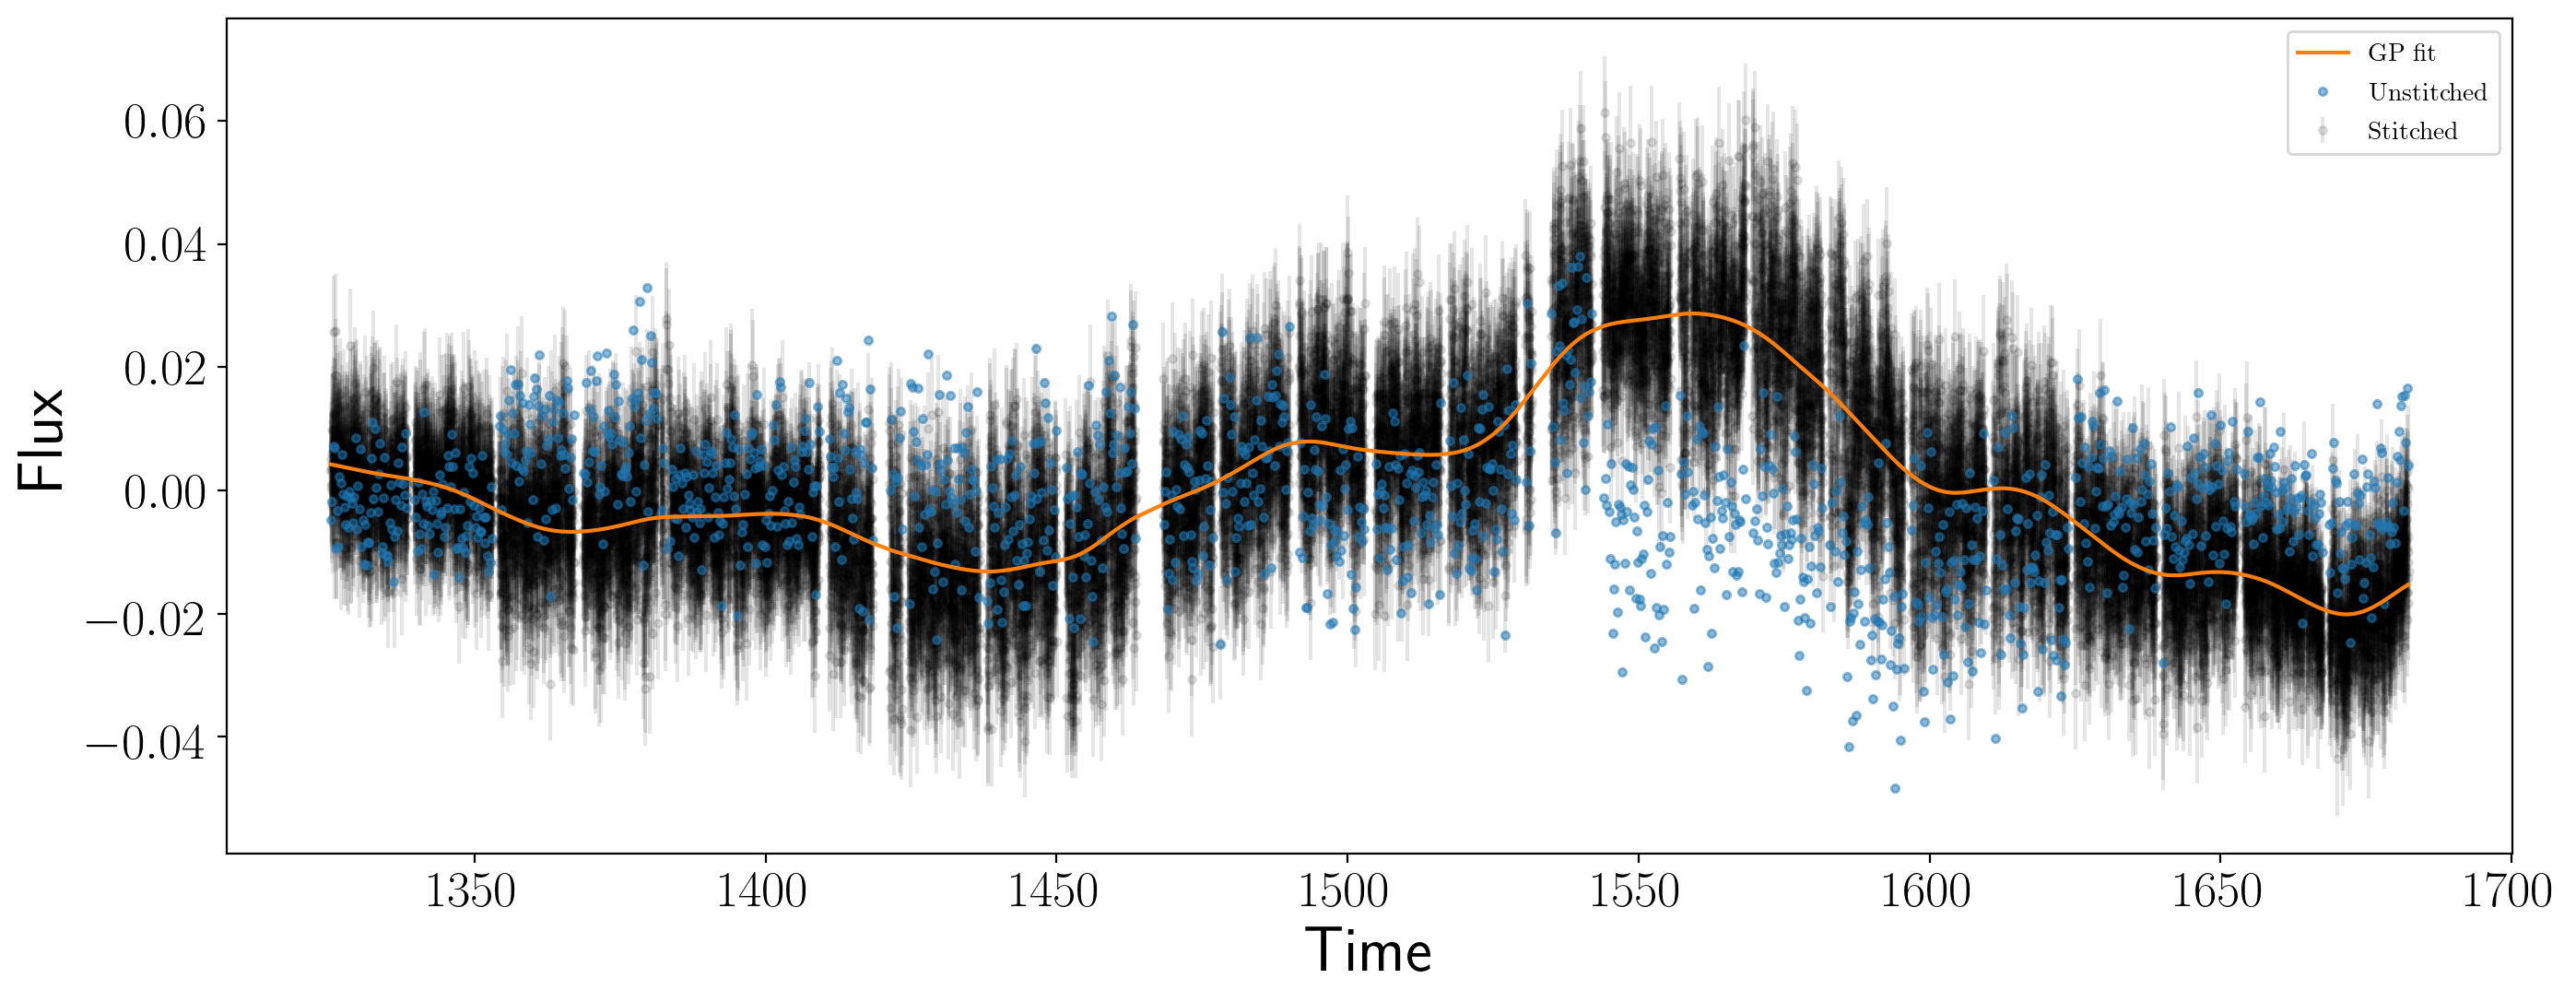

In [152]:
best_steps = []
for i in range(len(steps)):
    best_steps.append(float(map_soln[0][f"step{i+1}"]))

stitched = y - ss.step_model(x, gap_times, best_steps)
full_stitched = flux - ss.step_model(time, gap_times, best_steps)
w_full = np.polyfit(time, full_stitched, 1)
w = np.polyfit(x, stitched, 1)

plt.figure(figsize=(16, 6), dpi=200)
plt.plot(x, mu_gp - np.polyval(w, x), zorder=2, color="C1", label="$\mathrm{GP~fit}$")
plt.plot(x, y, "C0.", alpha=.5, zorder=1, label="$\mathrm{Unstitched}$")
plt.errorbar(time, full_stitched-np.polyval(w_full, time), yerr=flux_err, fmt="k.", alpha=.1, zorder=0, label="$\mathrm{Stitched}$")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Flux")

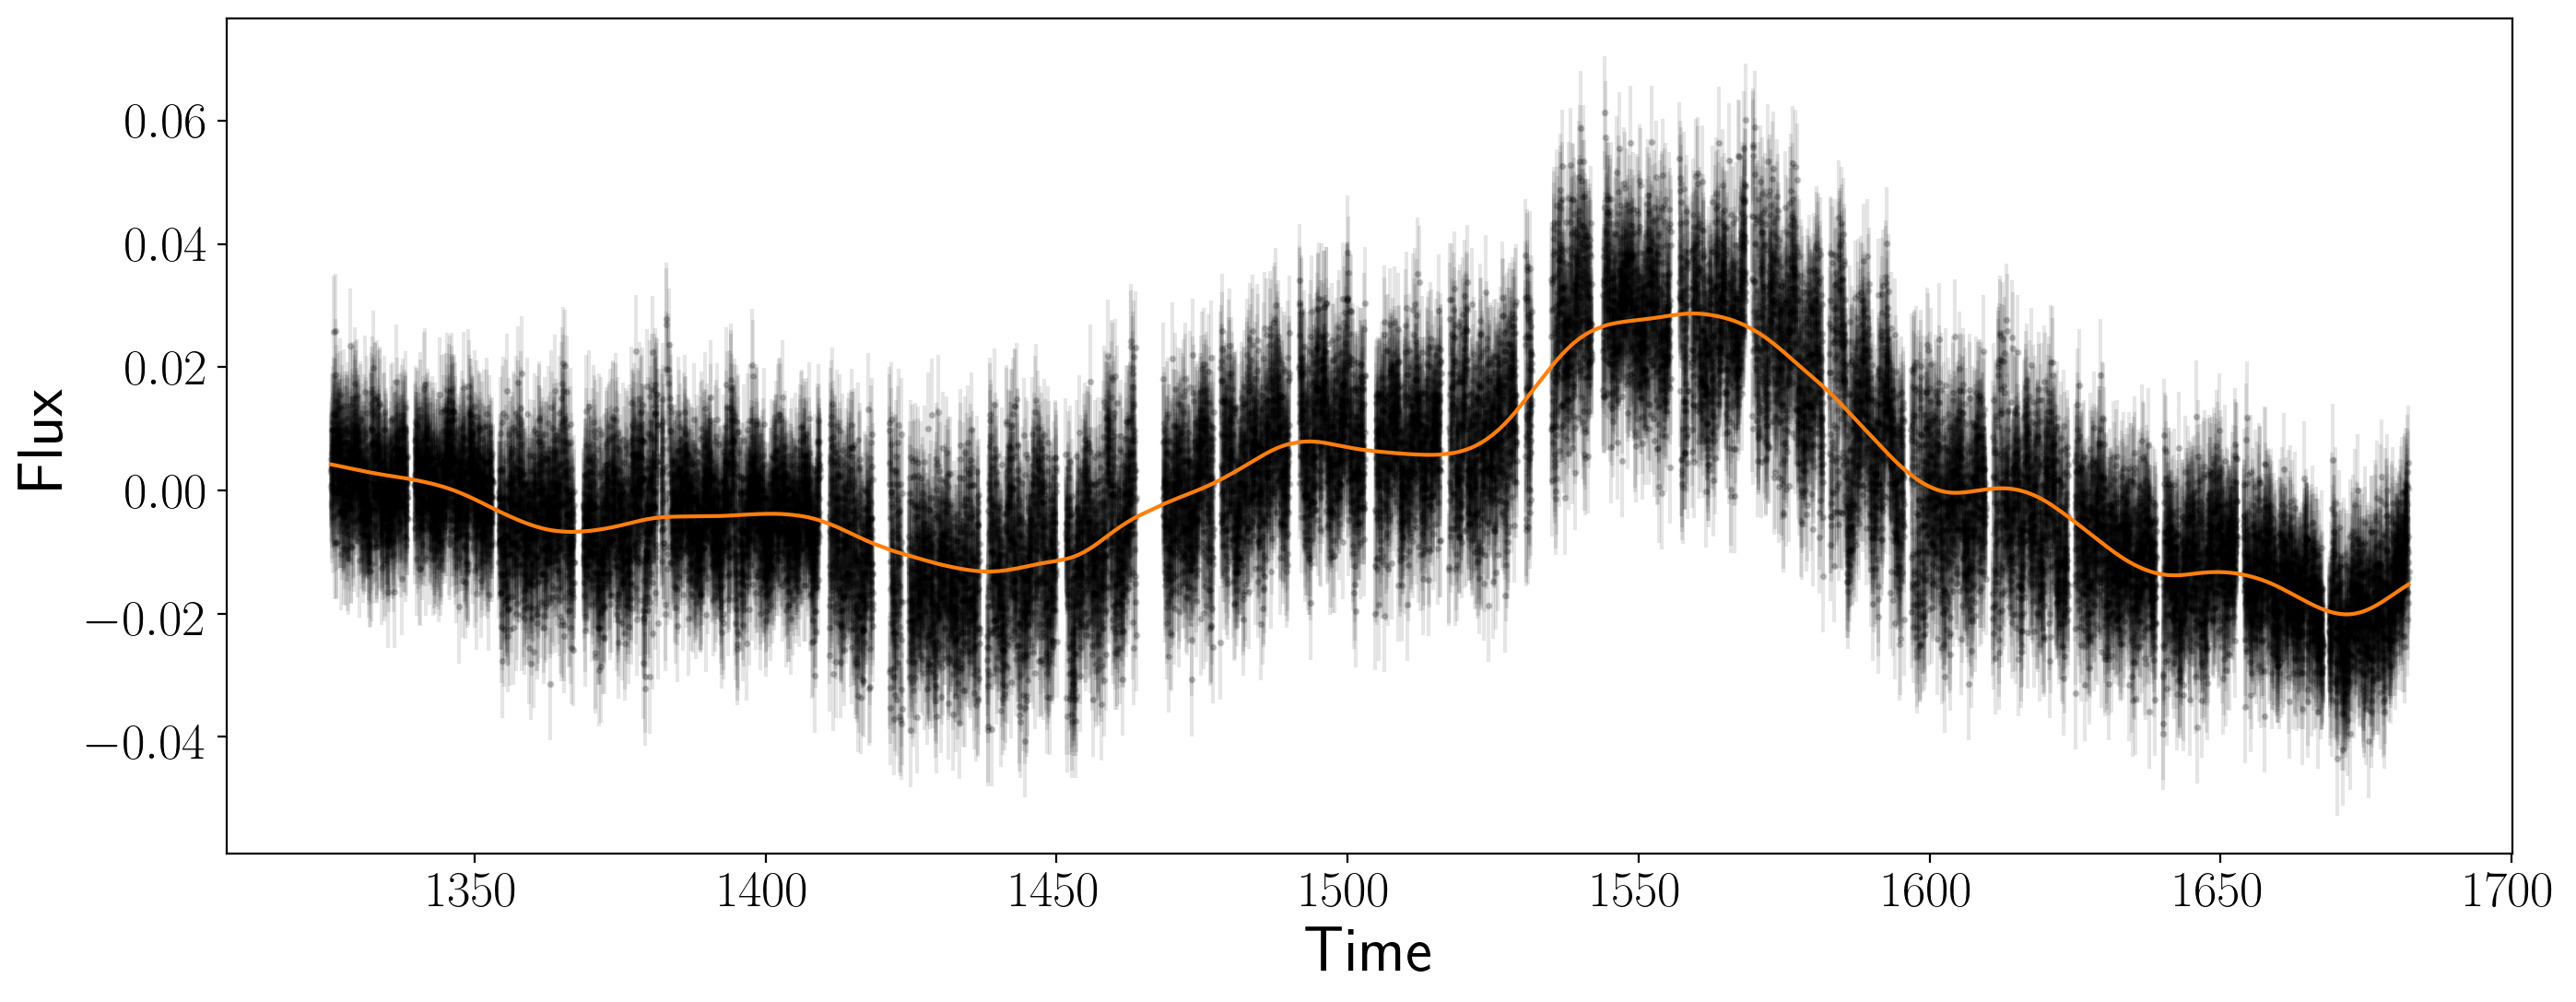

In [155]:
plt.figure(figsize=(16, 6), dpi=200)
plt.plot(x, mu_gp - np.polyval(w, x), zorder=2, color="C1", label="$\mathrm{GP~fit}$")
plt.errorbar(time, full_stitched-np.polyval(w_full, time), yerr=flux_err, fmt="k.", alpha=.1, zorder=0, ms=4,
             label="$\mathrm{Stitched,~detrended~light~curve}$")
plt.plot(time, full_stitched-np.polyval(w_full, time), "k.", alpha=.1, zorder=0, ms=3)
# leg = plt.legend(fontsize=20)


plt.xlabel("Time")
plt.ylabel("Flux")
plt.savefig("{}_lc".format(ticid))

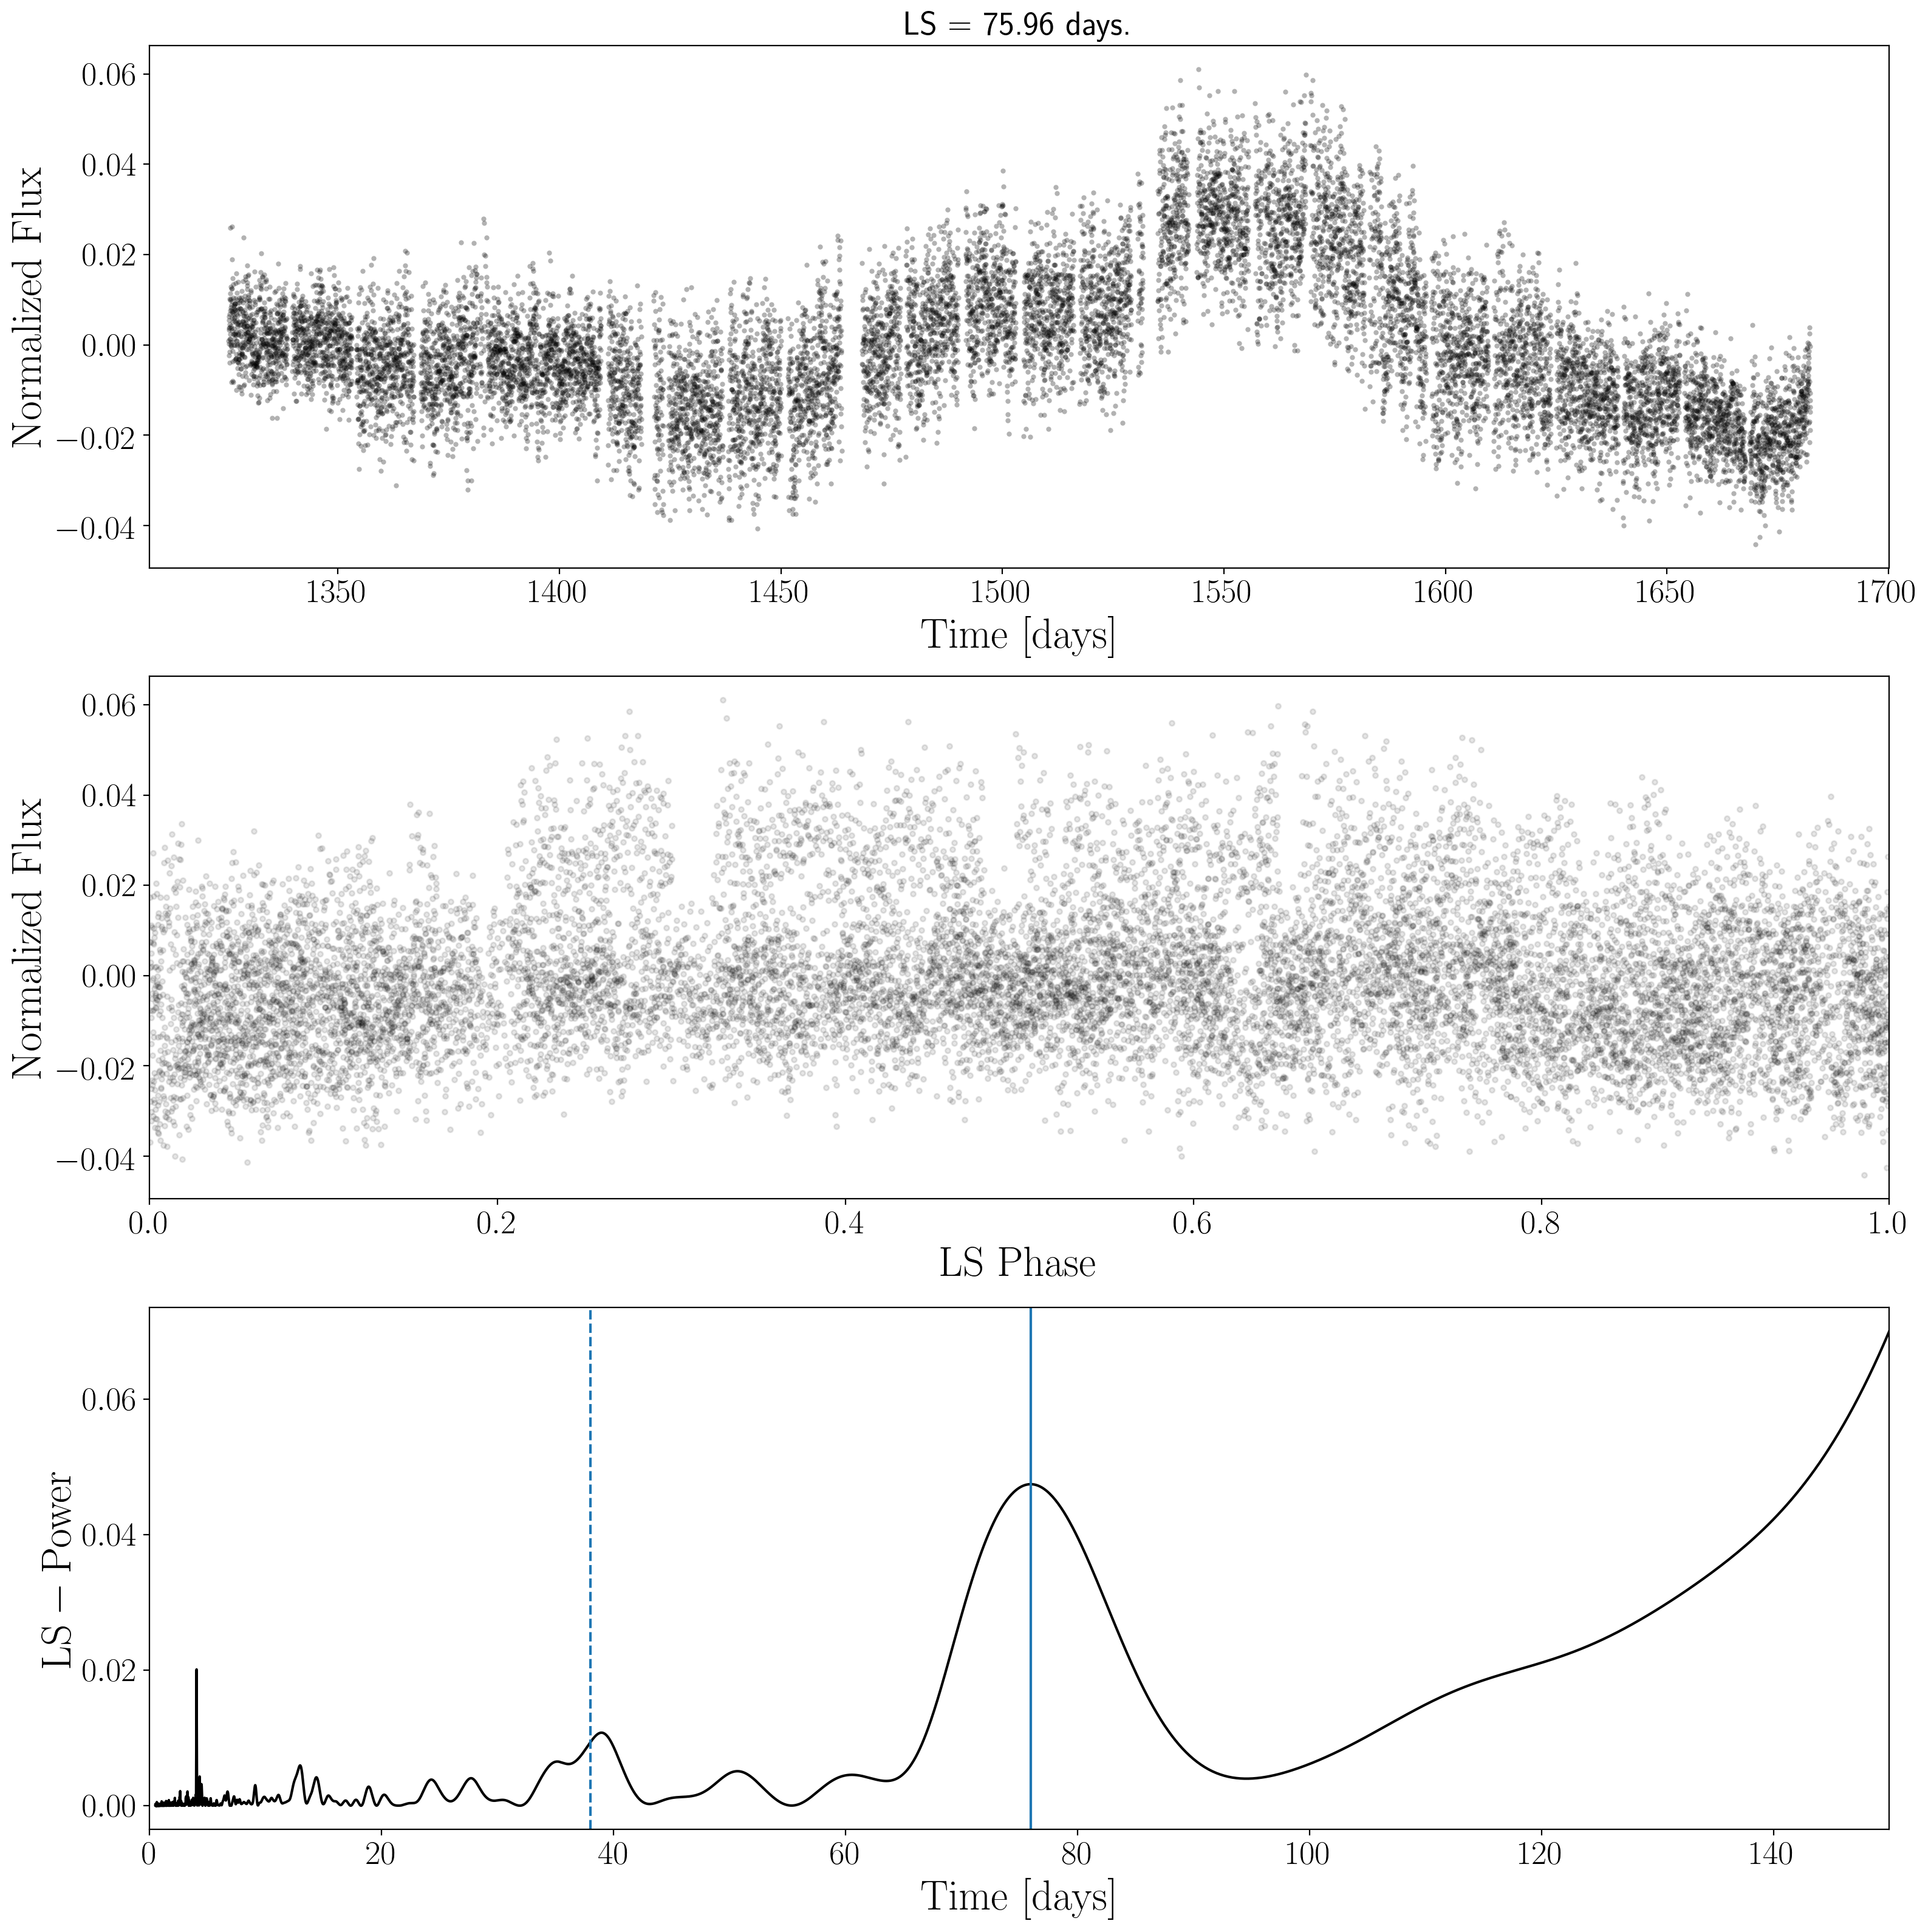

In [156]:
star = ss.RotationModel(time, full_stitched-np.polyval(w, time), flux_err)
ls_period = star.ls_rotation(max_period=150)
acf_period = star.acf_rotation(interval="TESS", window_length=5999)
# period_grid = np.linspace(50, 150, 1000)
# pdm_period = star.pdm_rotation(period_grid)
star.big_plot(["ls"], method_xlim=(0, 150));